In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
%matplotlib inline
import os
import warnings 
warnings.filterwarnings("ignore")

# <font color=blue> Author: Ingrid Bena Ria</font>

>Date: Monday, January 24th 2022<br>

In [23]:
dataset = pd.read_excel("C:\Jupyter\GRIP Jan 2022\Sample.xlsx")
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,26196,2,0,419136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,73194,3,0,219582
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,1462,2,0,68714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,9575775,5,45,-383031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22368,2,2,25164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25248,3,2,41028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,9196,2,0,156332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258576,2,2,193932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,296,4,0,1332


In [24]:
dataset.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,26196,2,0,419136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,73194,3,0,219582
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,1462,2,0,68714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,9575775,5,45,-383031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22368,2,2,25164


In [63]:
dataset.tail(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,Long Beach,New York,East,Office Supplies,Labels,315,10,0,1512
9985,Standard Class,Consumer,Long Beach,New York,East,Office Supplies,Supplies,556,4,0,16124
9986,Standard Class,Consumer,Los Angeles,California,West,Technology,Accessories,3624,1,0,152208
9987,Standard Class,Corporate,Athens,Georgia,South,Technology,Accessories,7999,1,0,287964
9988,Standard Class,Corporate,Athens,Georgia,South,Technology,Phones,2061,5,0,55647
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25248,3,2,41028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,9196,2,0,156332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258576,2,2,193932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,296,4,0,1332
9993,Second Class,Consumer,Westminster,California,West,Office Supplies,Appliances,24316,2,0,72948



# <font color=blue> DATA ANALYSIS</font>

In [ ]:
dataset.shape

In [ ]:
dataset.columns

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ship Mode     9994 non-null   object
 1   Segment       9994 non-null   object
 2   Country       9994 non-null   object
 3   City          9994 non-null   object
 4   State         9994 non-null   object
 5   Postal Code   9994 non-null   int64 
 6   Region        9994 non-null   object
 7   Category      9994 non-null   object
 8   Sub-Category  9994 non-null   object
 9   Sales         9994 non-null   int64 
 10  Quantity      9994 non-null   int64 
 11  Discount      9994 non-null   int64 
 12  Profit        9994 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 1015.1+ KB


# Count of Unique Values in Each Column

In [8]:
for i in dataset.columns:
    print(i,len(dataset[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5336
Quantity 14
Discount 12
Profit 7063


# Count of Unique Values in Each Row

In [9]:
print(dataset.nunique(axis=1))

0       13
1       13
2       13
3       13
4       12
        ..
9989    13
9990    13
9991    12
9992    13
9993    13
Length: 9994, dtype: int64


# Count of Each of the Distinct Values of a Spesific Column
>Date: For example in the column "Profit": we got:</br>


In [10]:
print(dataset['Profit'].value_counts())

0         65
62208     43
93312     38
54432     32
36288     32
          ..
30134      1
35256      1
586872     1
125469     1
72948      1
Name: Profit, Length: 7063, dtype: int64


# Check for Null Values (Data Cleaning)
    - Indicate if there any missing values  in dataframe as a whole
    - Indicate if there any missing values accross each column
    - Indicate groupby count of missing values of a column
    

In [11]:
dataset.describe() 

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03
mean,55190.379428,1.132271e+05,3.789574,1.754653,1.800957e+05
std,32063.693350,5.186212e+05,2.225110,3.119014,1.722971e+06
min,1040.000000,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,23223.000000,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,56430.500000,1.108800e+04,3.000000,2.000000,3.630900e+04
75%,90008.000000,5.399175e+04,5.000000,2.000000,1.509840e+05
max,99301.000000,2.396266e+07,14.000000,45.000000,6.719981e+07


In [12]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#Find the number of duplicate data
dataset.duplicated().sum()

17

In [39]:
#The duplicated datas
dataset[dataset.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,1944,3,0,93312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10368,2,2,36288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15552,3,2,54432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,2592,4,0,124416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,2592,4,0,124416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,1284,3,0,5778
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,1296,2,0,62208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,1944,3,0,93312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,4912,4,0,230864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281372,2,3,-120588


In [15]:
#Drop the duplicated rows
dataset.drop_duplicates(inplace = True)
# Find the no. of rows and columns
dataset.shape

(9977, 13)

In [16]:
#Calculated Field
dataset['Profit Margin %'] = (dataset.Profit / dataset.Sales) * 100
dataset.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,26196,2,0,419136,1600.0
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,73194,3,0,219582,300.0
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,1462,2,0,68714,4700.0
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,9575775,5,45,-383031,-4.0
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22368,2,2,25164,112.5


In [17]:
#Gives the unique values into the column Ship Mode
dataset['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [18]:
#Gives the unique values into the column City
dataset['City'].unique() 

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

# <font color=blue>Correlation</font>

In [19]:
dataset.corr()

,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin %
Postal Code,1.000000,0.028585,0.013110,0.072433,-0.022373,-0.074884
Sales,0.028585,1.000000,0.107923,0.394118,0.050867,-0.111557
Quantity,0.013110,0.107923,1.000000,0.008944,0.062290,0.002515
Discount,0.072433,0.394118,0.008944,1.000000,-0.148465,-0.424275
Profit,-0.022373,0.050867,0.062290,-0.148465,1.000000,0.184455
Profit Margin %,-0.074884,-0.111557,0.002515,-0.424275,0.184455,1.000000


<AxesSubplot:>

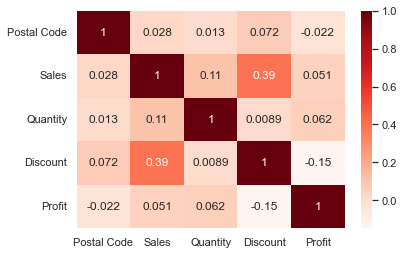

In [40]:
correlation = dataset.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='Reds')

In [41]:
#Descriptive statistics summary
dataset.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9.994000e+03,9994.000000,9994.000000,9.994000e+03
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,1.132271e+05,3.789574,1.754653,1.800957e+05
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,5.186212e+05,2.225110,3.119014,1.722971e+06
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,1.108800e+04,3.000000,2.000000,3.630900e+04
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,5.399175e+04,5.000000,2.000000,1.509840e+05


# <font color=blue>Data Visualization</font>

In [22]:
#visualizing the correlation between the features
sns.heatmap(df.corr(),annot=True)

NameError: name 'df' is not defined

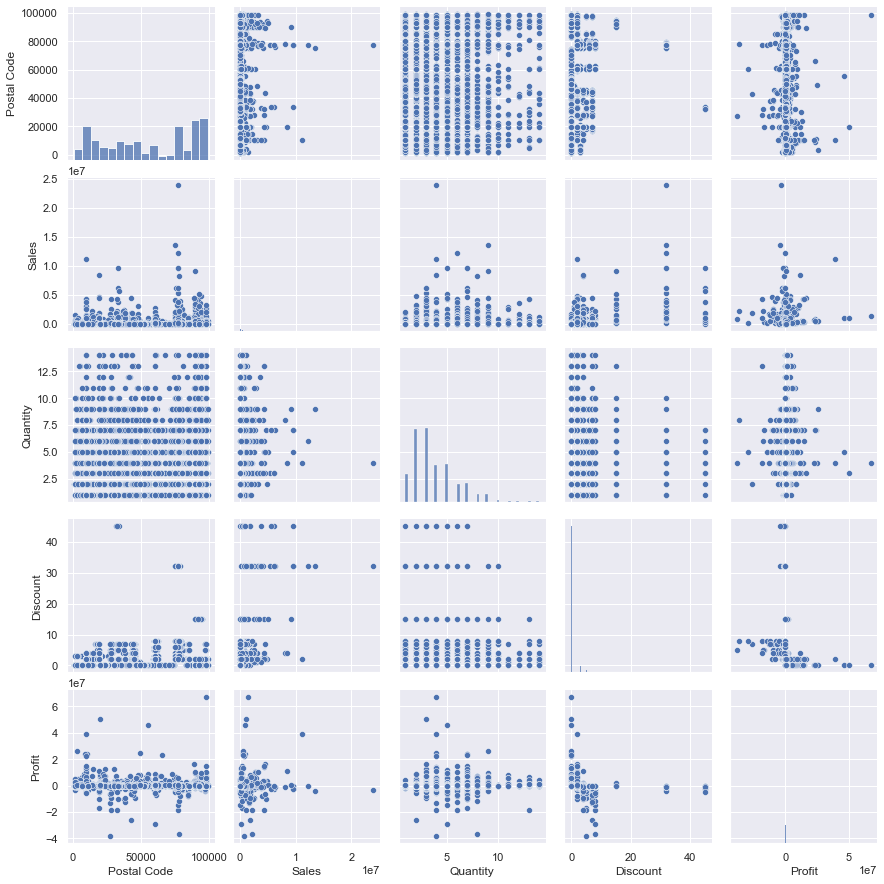

In [42]:
sns.pairplot(dataset)

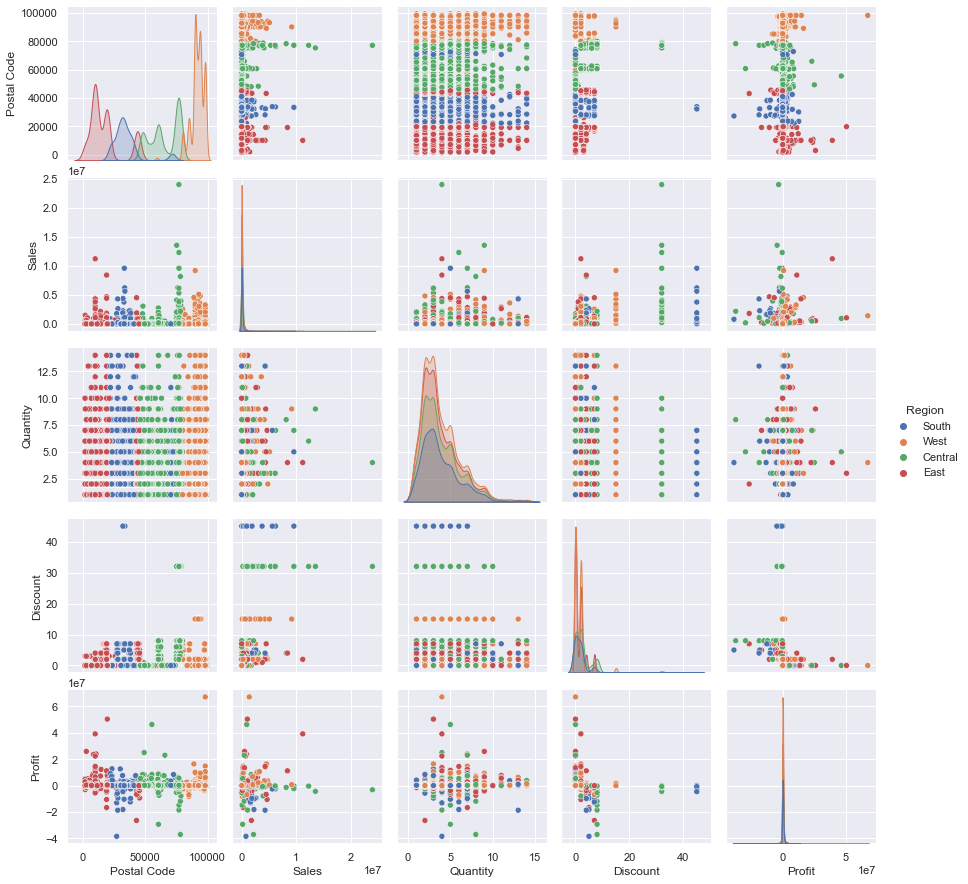

In [43]:
sns.pairplot(dataset,hue="Region")

In [44]:
sns.set()

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

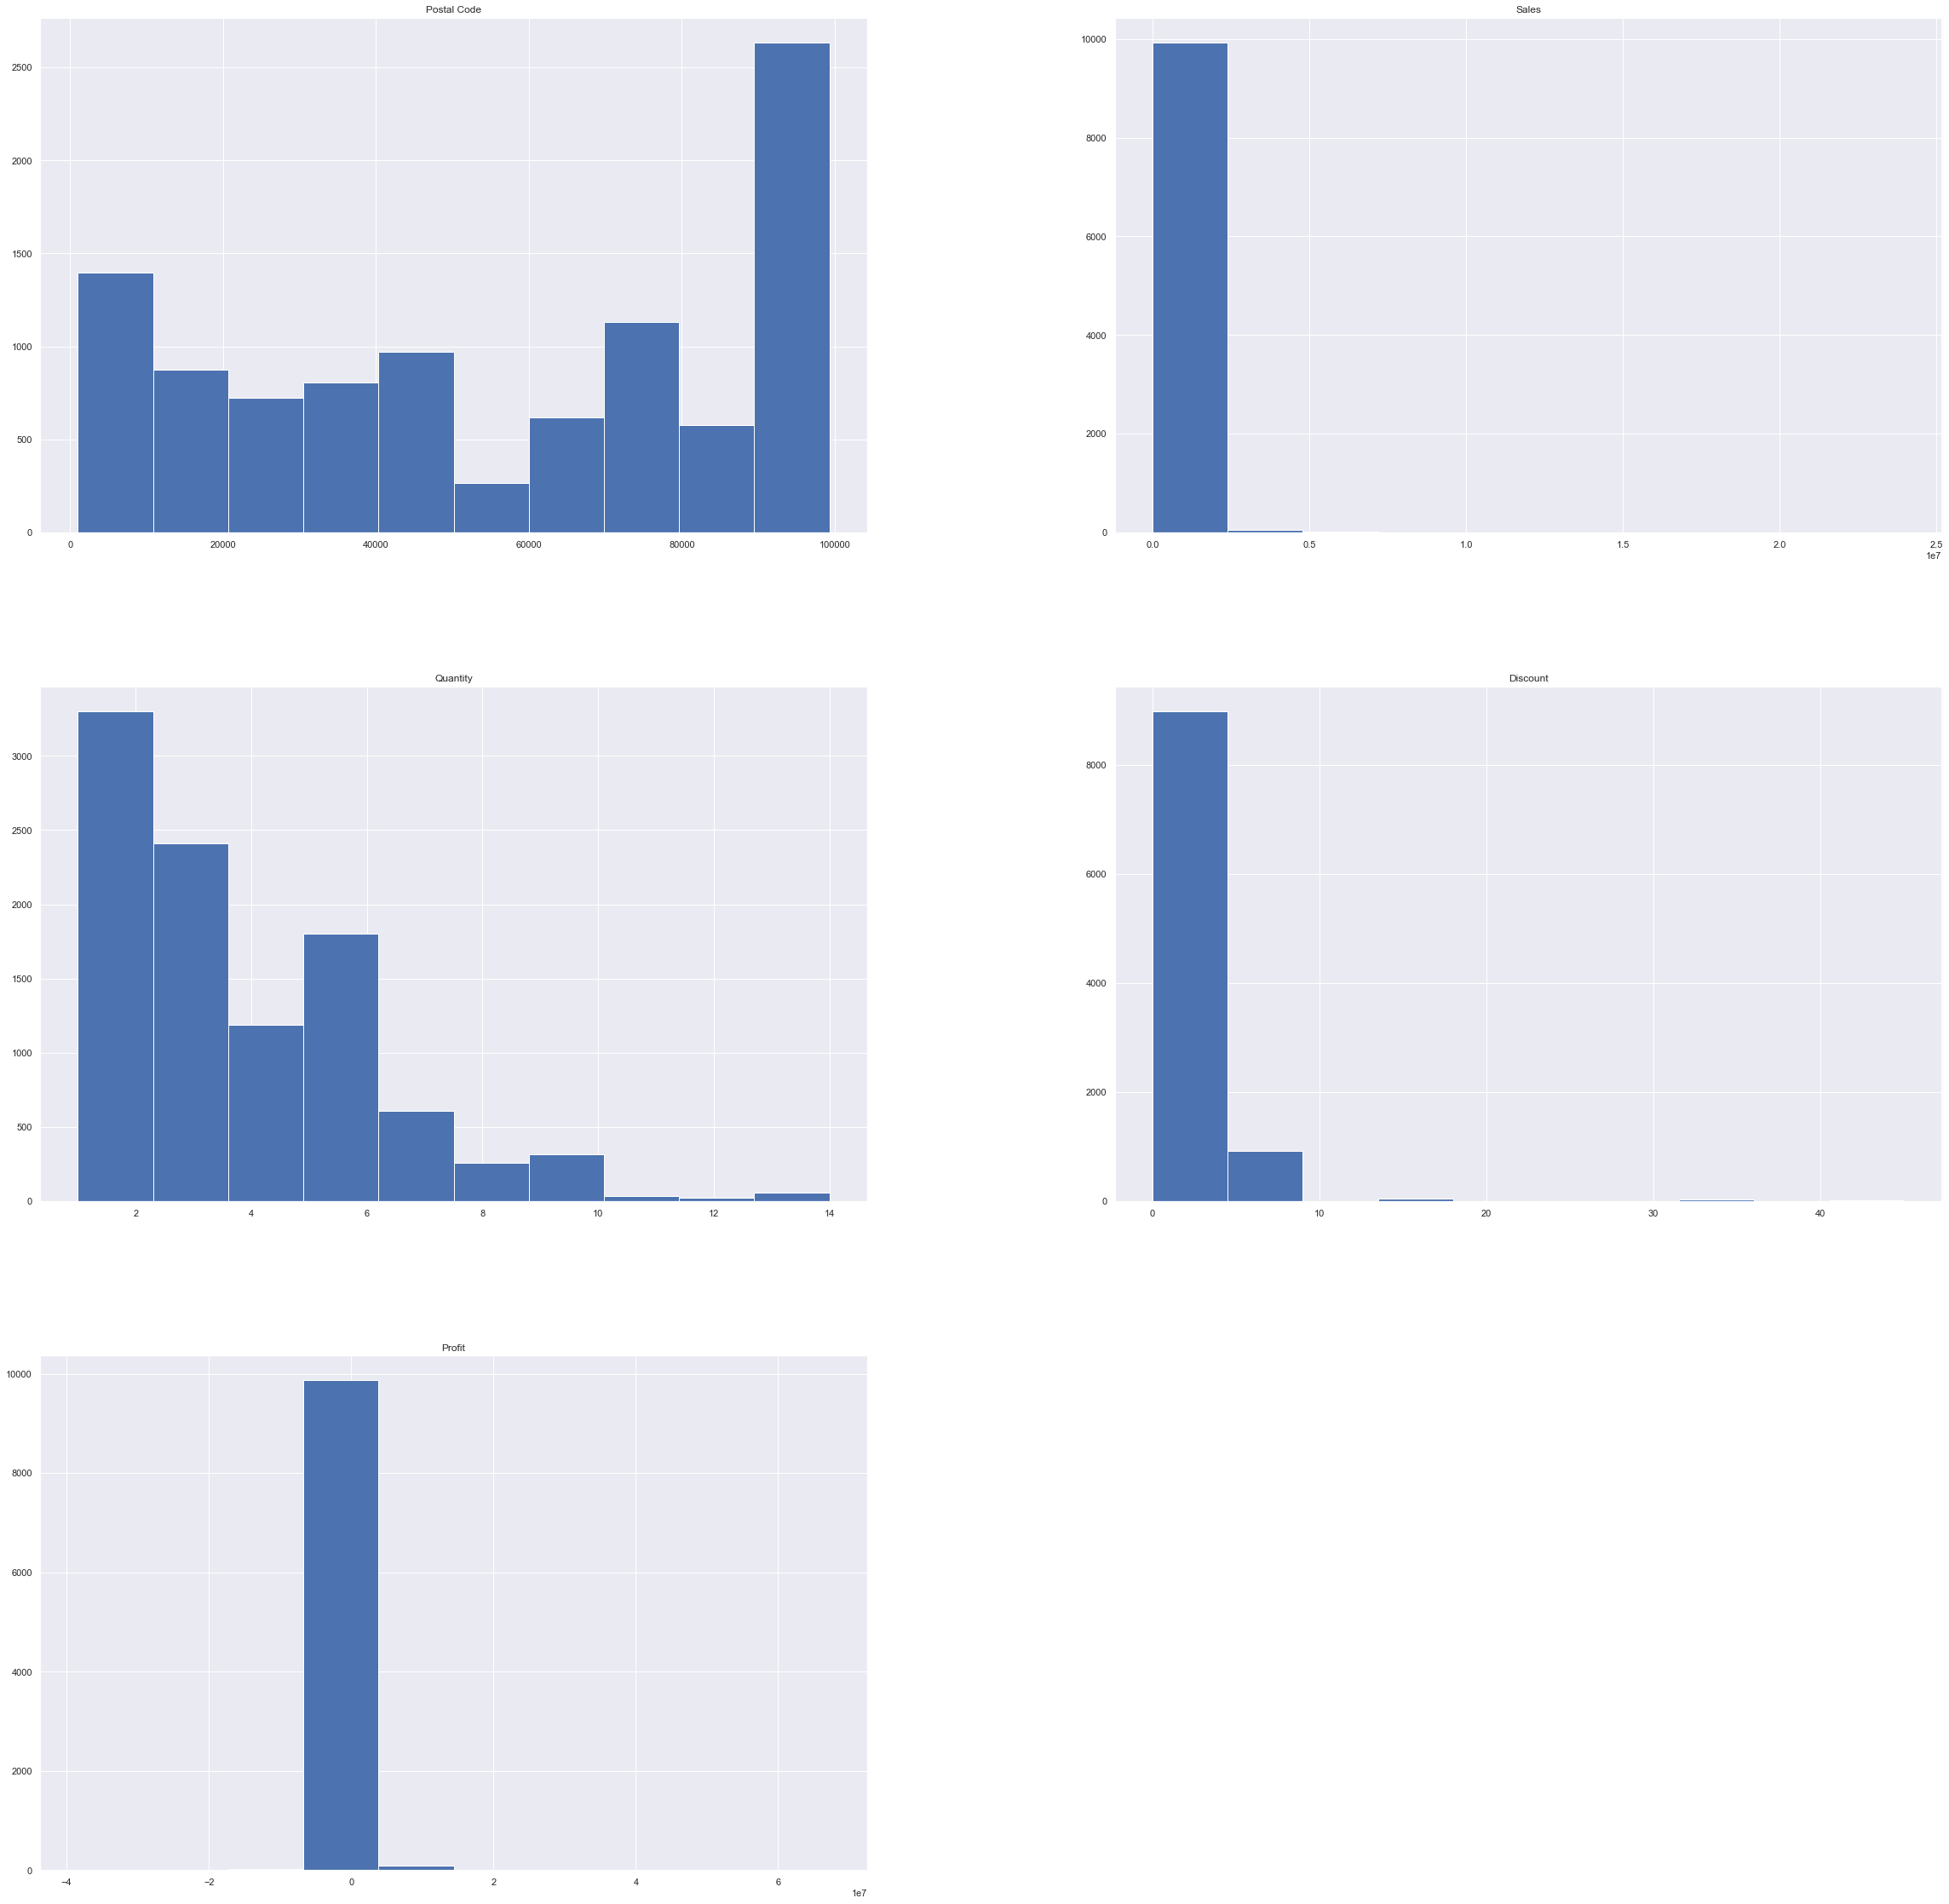

In [45]:
#Creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

ax = fig.gca()
dataset.hist(ax = ax)



<AxesSubplot:xlabel='Profit', ylabel='Density'>

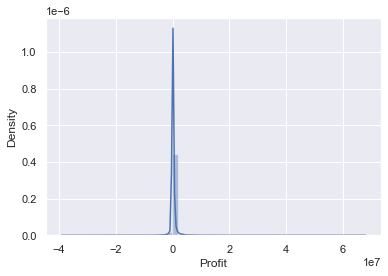

In [46]:
#Distribution plot 
sns.distplot(dataset['Profit'])

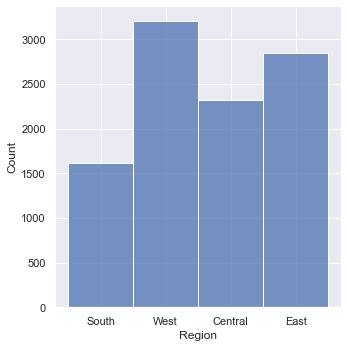

In [47]:
sns.displot(dataset['Region'])

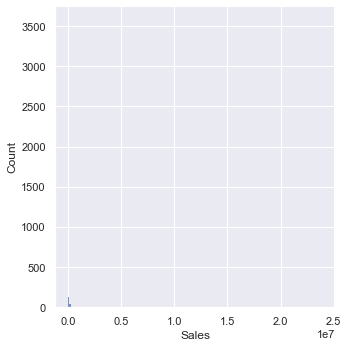

In [48]:
#Distribution plot 
sns.displot(dataset['Sales'])

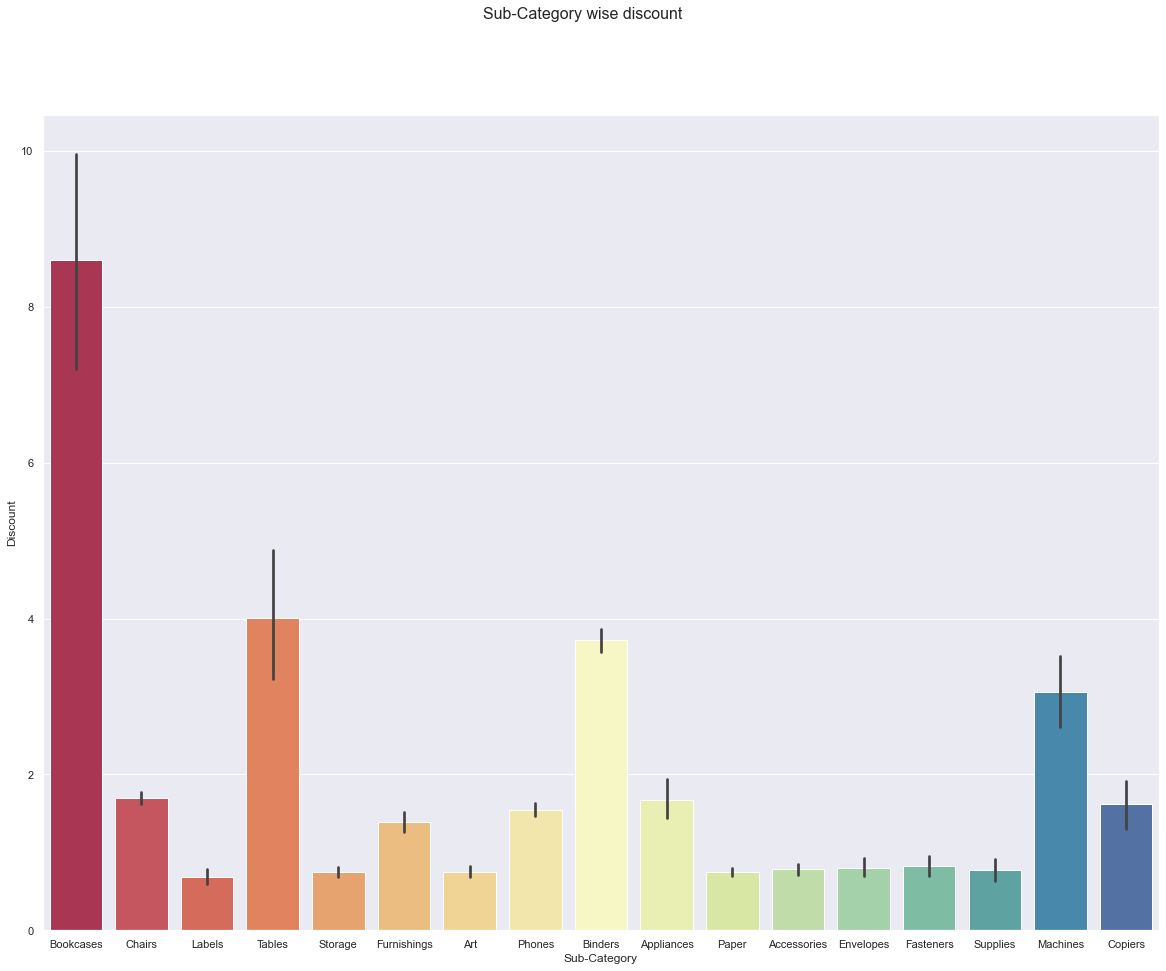

In [49]:
sns.set(style="darkgrid")
plt.figure(2, figsize=(20,15))
sns.barplot(x='Sub-Category',y='Discount',data=dataset, palette='Spectral')
plt.suptitle('Sub-Category wise discount', fontsize=16)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

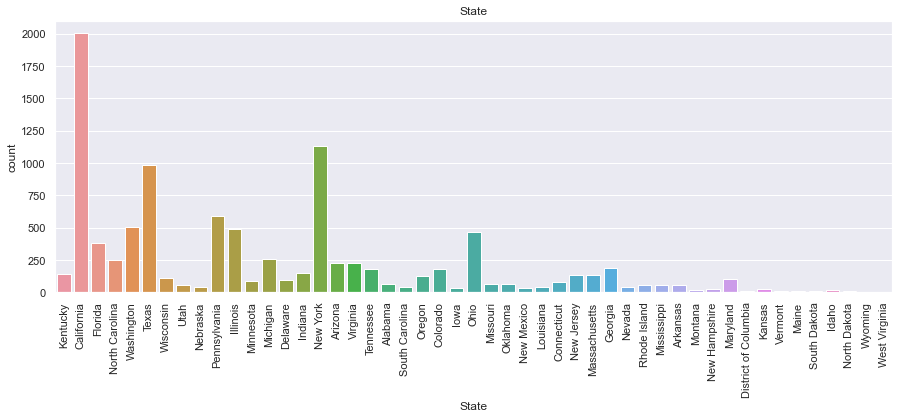

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x=dataset['State'])
plt.xticks(rotation=90)
plt.title("State")
plt.show

Text(0.5, 1.0, 'Profitability and Sales by Sub Categories')

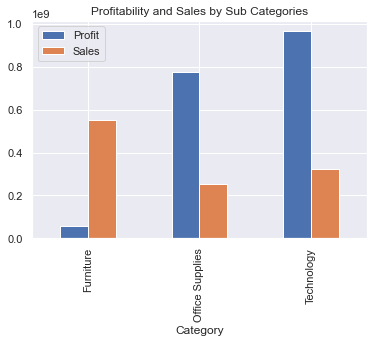

In [51]:
dataset.groupby ('Category')['Profit','Sales'].agg(sum).plot.bar()
plt.title('Profitability and Sales by Sub Categories')

In [52]:
df['Category'].value_counts()
plt.figure(figsize=(10,10))
dataset['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

NameError: name 'df' is not defined

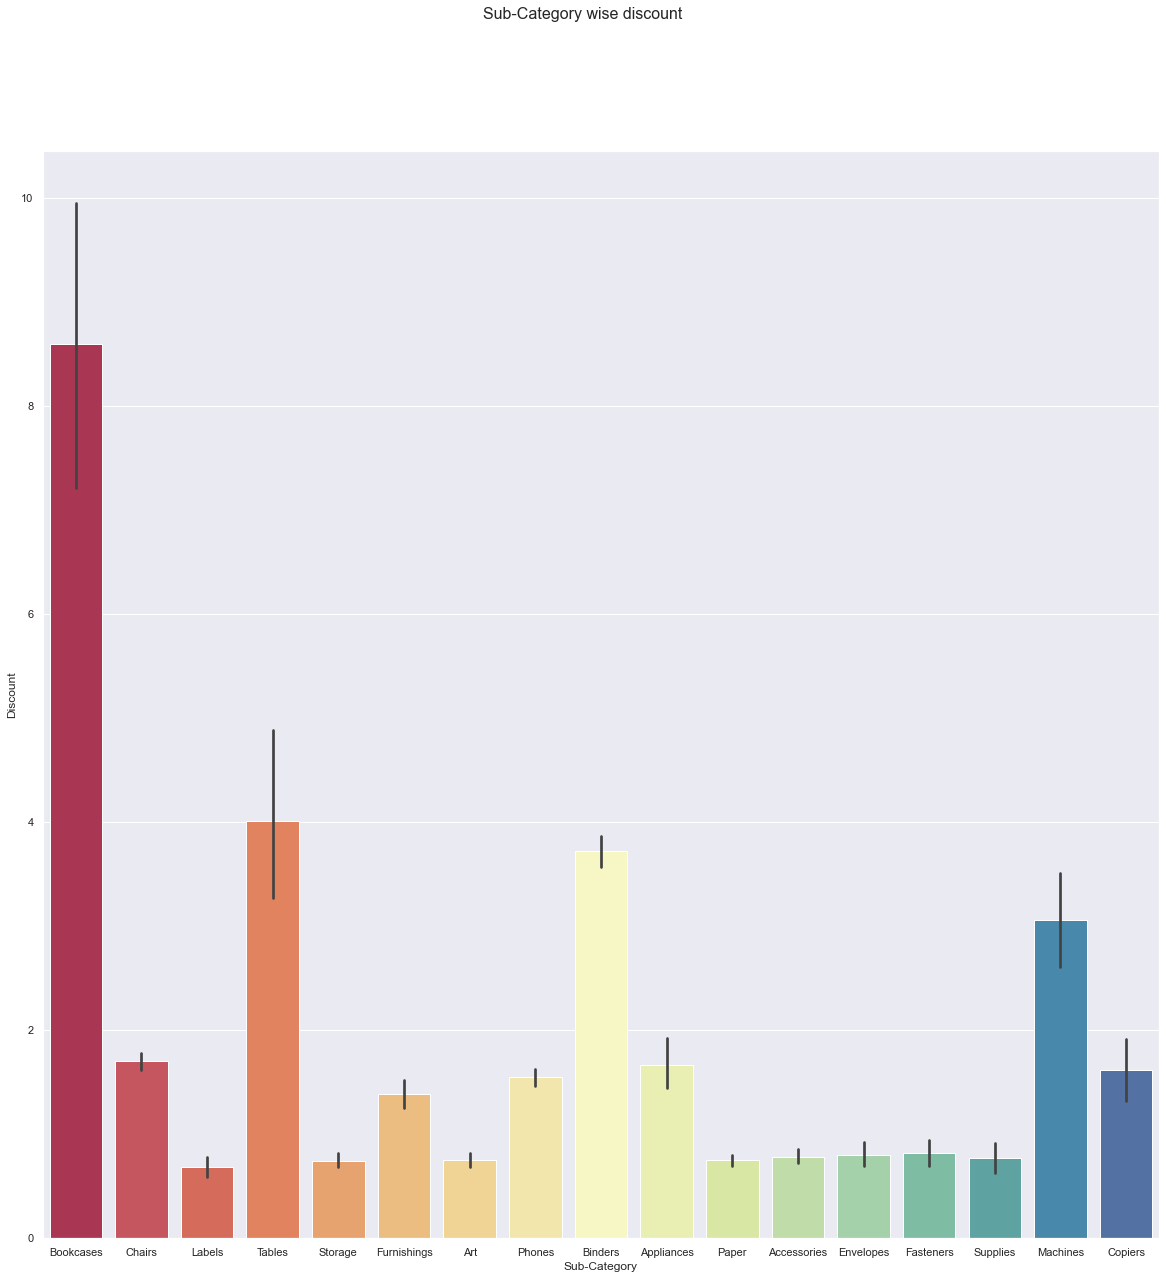

In [53]:
sns.set(style="darkgrid")
plt.figure(2, figsize=(20,20))
sns.barplot(x='Sub-Category',y='Discount', data=dataset, palette='Spectral')
plt.suptitle('Sub-Category wise discount', fontsize=16)
plt.show()

In [54]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5336
Quantity          14
Discount          12
Profit          7063
dtype: int64

In [55]:
# Drop unecessary columns:
dataset = dataset.drop(columns={'Country','Postal Code'},axis=1)
dataset.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,26196,2,0,419136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,73194,3,0,219582
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,1462,2,0,68714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,9575775,5,45,-383031
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22368,2,2,25164


In [56]:
# Group by
category_sales_profit = dataset.groupby('Category').sum()
display(category_sales_profit)

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,551391138,8028,5614,59222369
Office Supplies,255389649,22906,9478,775994074
Technology,324810933,6939,2444,964660095


In [57]:
#Group sales, profit and quantity by category
category_analysis = pd.DataFrame(dataset.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,551391138,59222369,8028
Office Supplies,255389649,775994074,22906
Technology,324810933,964660095,6939


In [58]:
Segment_sales_profit=dataset.groupby('Segment').sum()
display(Segment_sales_profit)

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,599181488,19521,9218,911080571
Corporate,334243082,11608,5377,509726140
Home Office,198167150,6744,2941,379069827


In [59]:
# group by quantity , sales and profit
Quantity_sales_profit = dataset.groupby('Quantity').sum() 
display(Quantity_sales_profit)

,Sales,Discount,Profit
Quantity,,,
1,31868254,1556,37786843
2,164612802,4149,193309184
3,248840991,4150,419097135
4,182031203,2115,309746771
5,71857741,2139,164646750
6,116324529,1049,77379714
7,136723734,1176,283168473
8,61826580,468,67099551
9,78224832,424,165317616


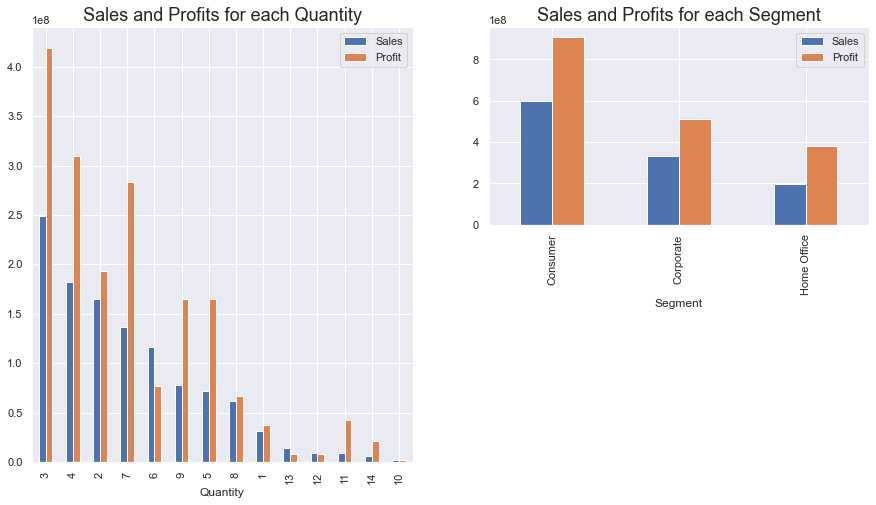

In [60]:
#Sales and Profits of each Quantity and each Segment
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(222)
dataset.groupby("Quantity")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar",ax=ax1)
ax1.set_title("Sales and Profits for each Quantity",size=18)
dataset.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar",ax=ax2)
ax2.set_title("Sales and Profits for each Segment",size=18)
plt.show()

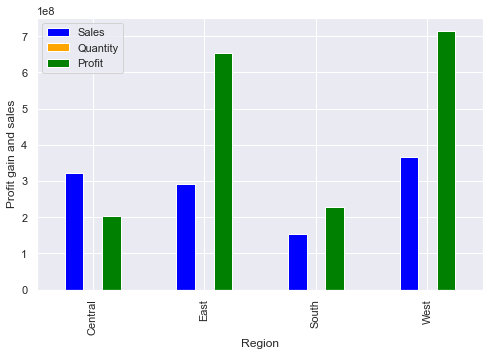

In [61]:
# Plotting the sales and profit for each segment
dataset.groupby('Region')[['Sales','Quantity','Profit']].sum().plot.bar(color=['blue','orange','green'],figsize=(8,5))
plt.ylabel('Profit gain and sales')
plt.show()

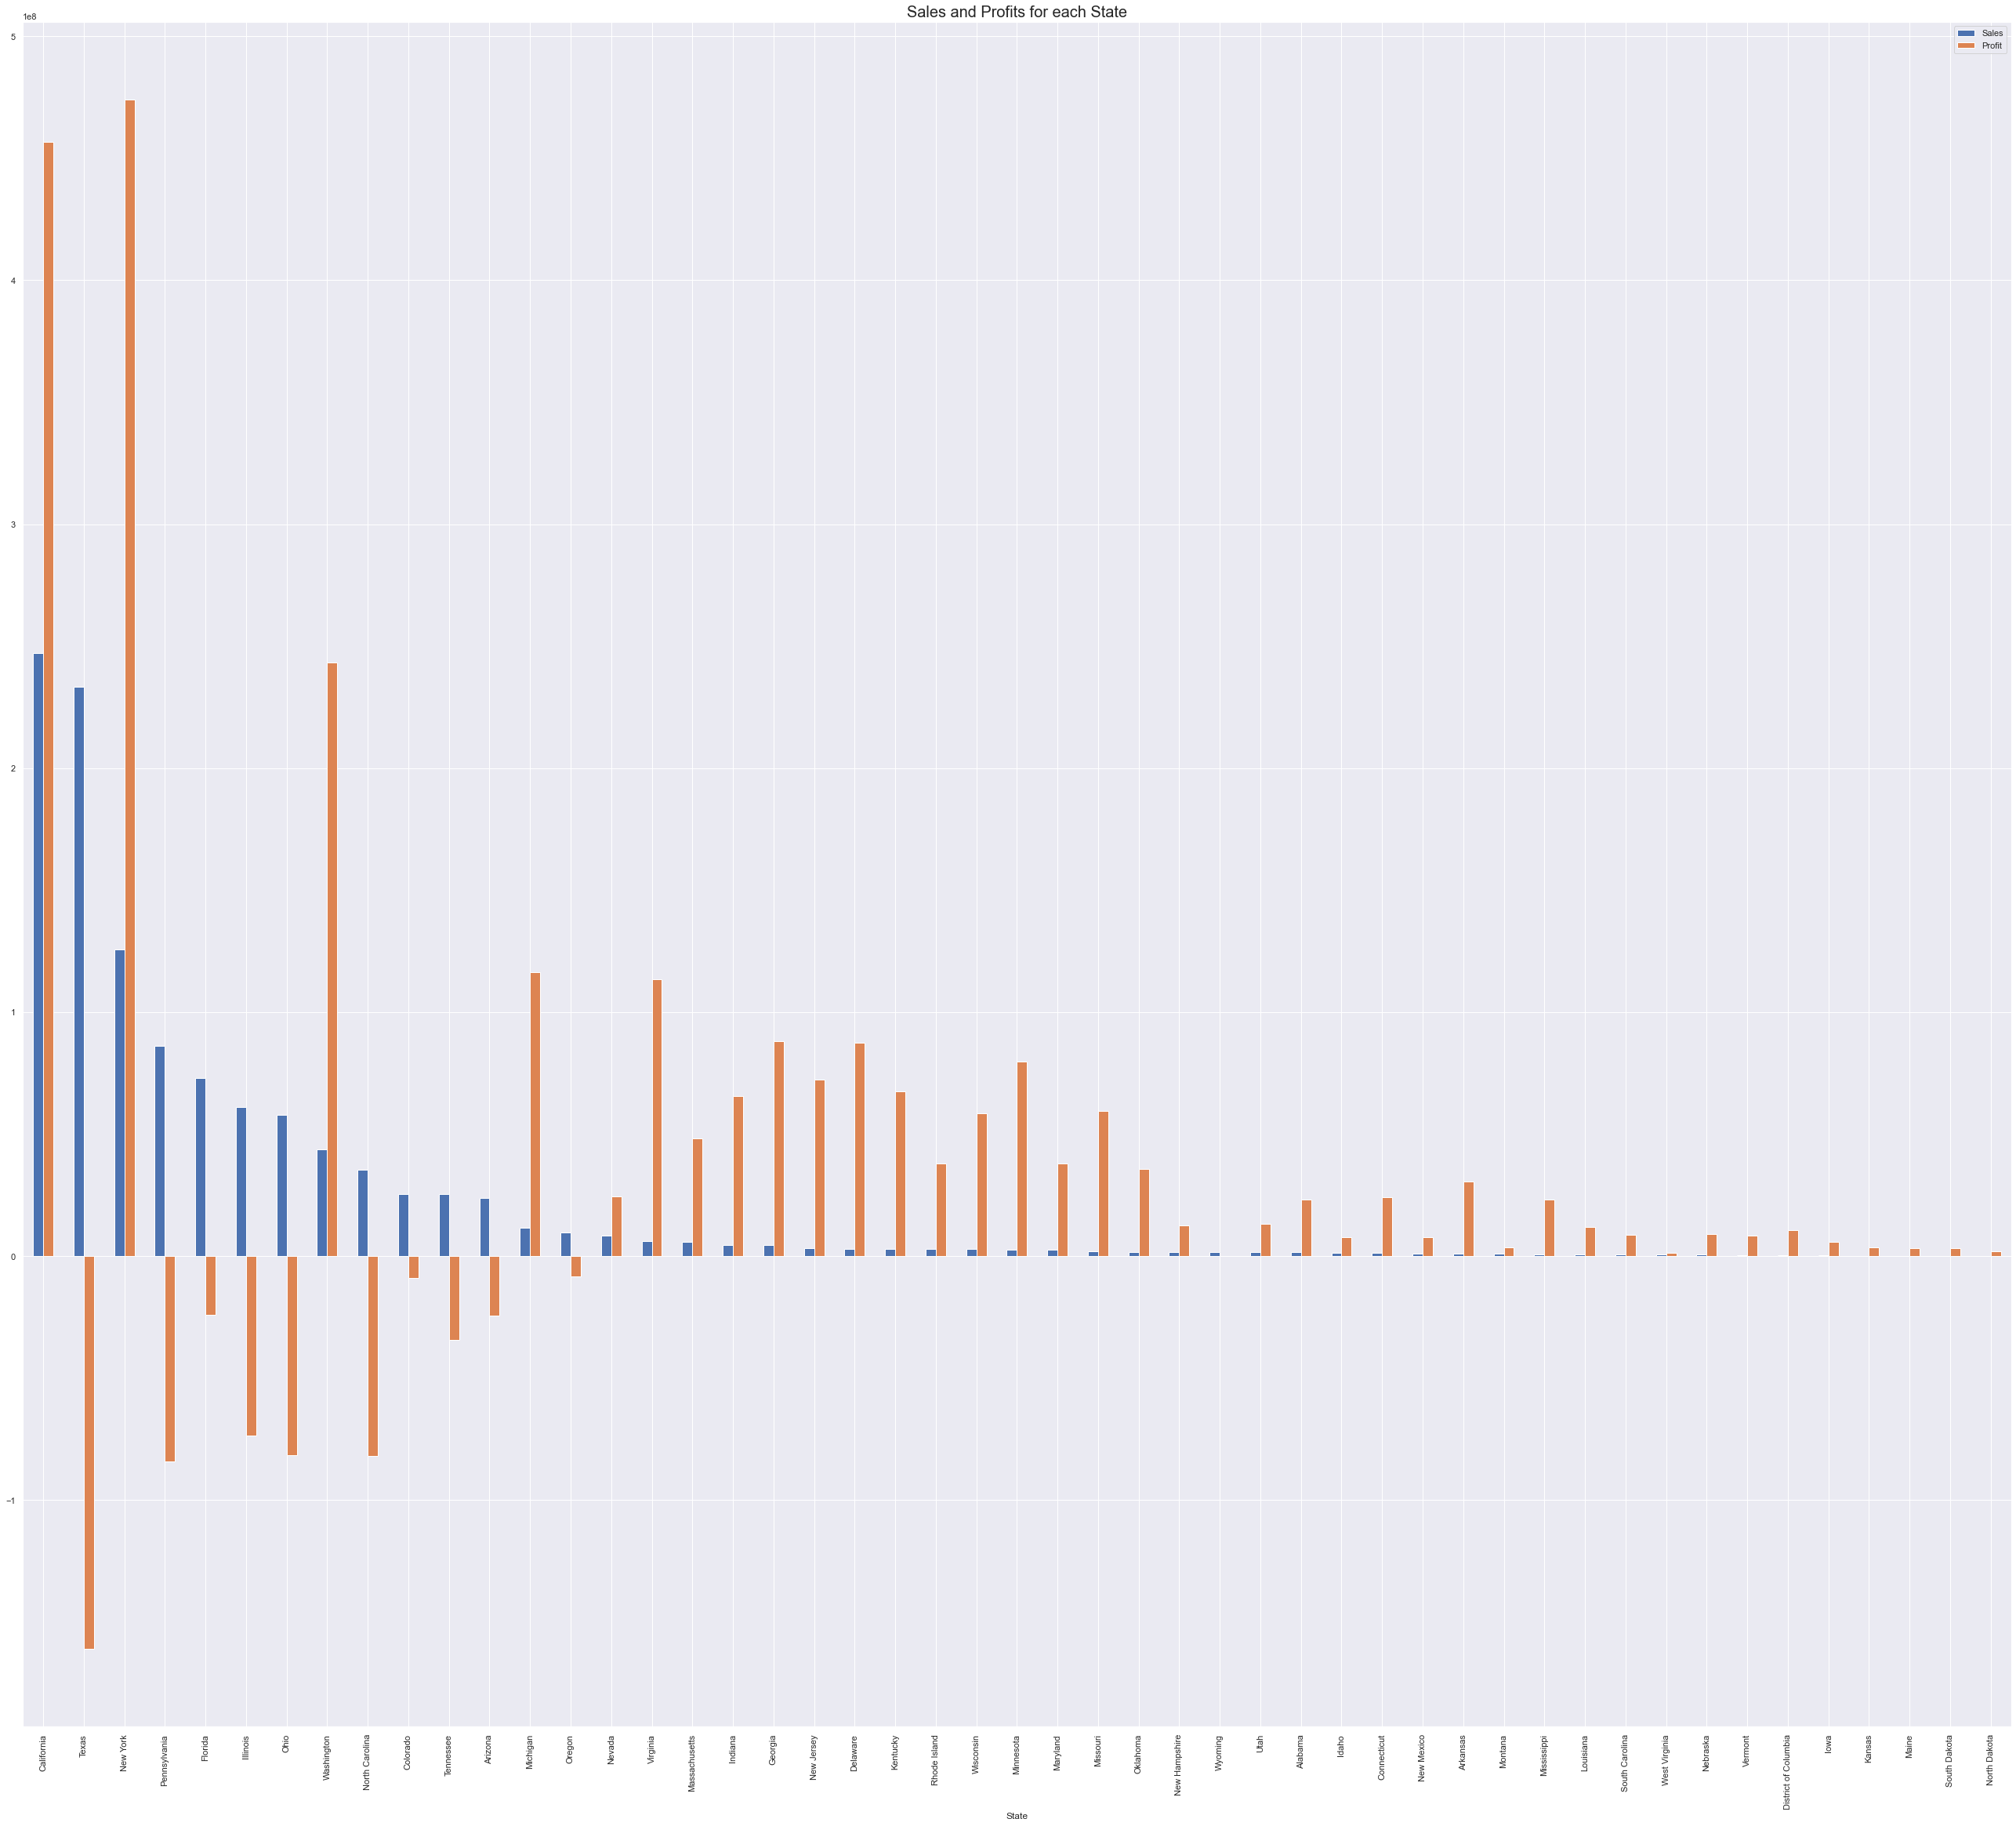

In [62]:
#Sales and Profits of each State
fig = plt.figure(figsize =(100,40))
ax1 = fig.add_subplot(121)
dataset.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar",ax=ax1)
ax1.set_title("Sales and Profits for each State", size=20)
plt.show()

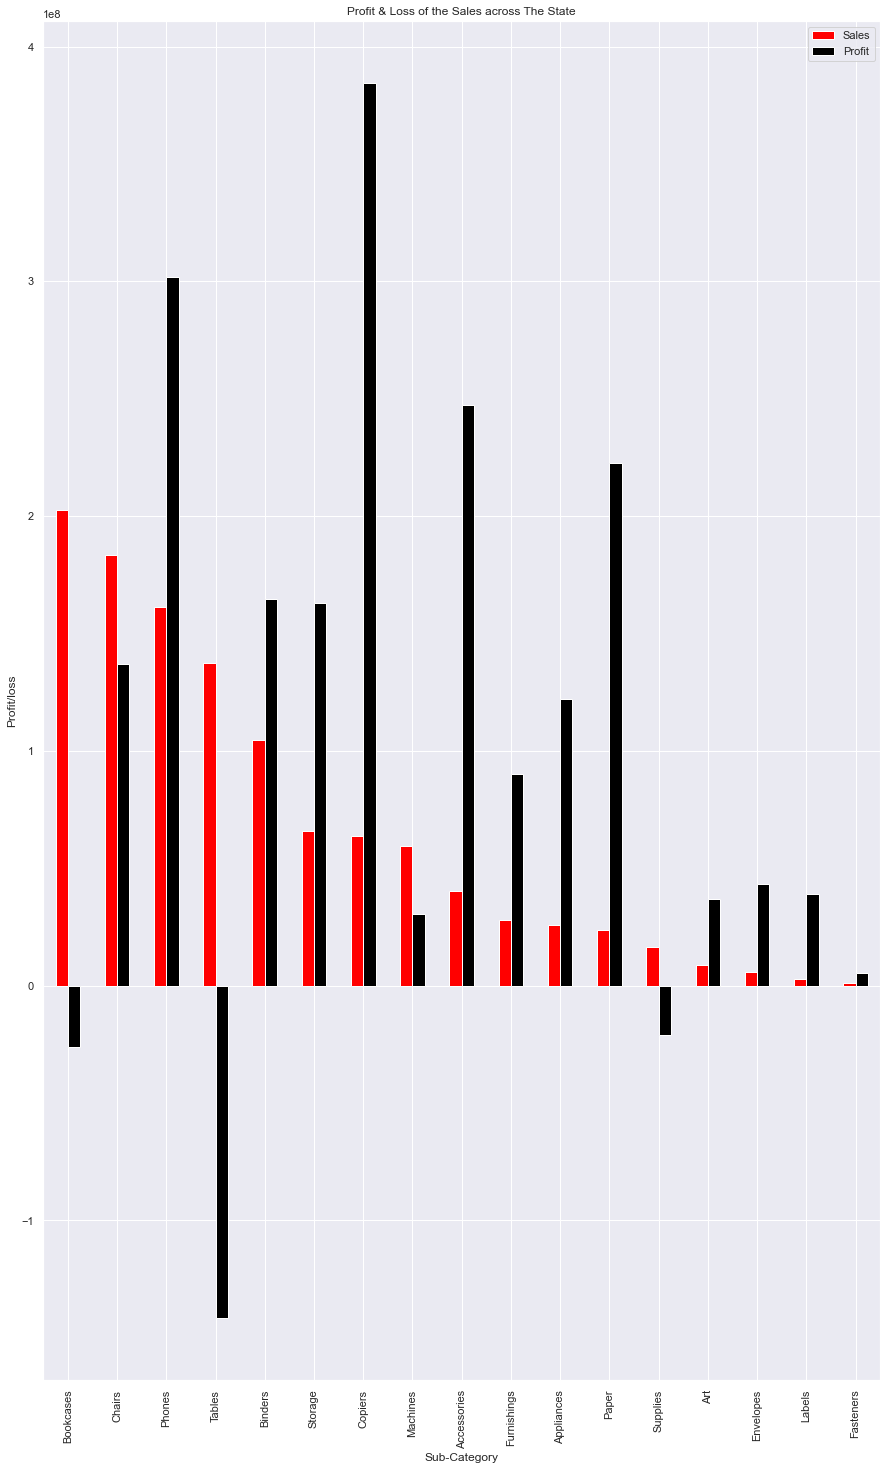

In [64]:
ps = dataset.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','black'],figsize=(15,25))
plt.title('Profit & Loss of the Sales across The State')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss')
plt.show()

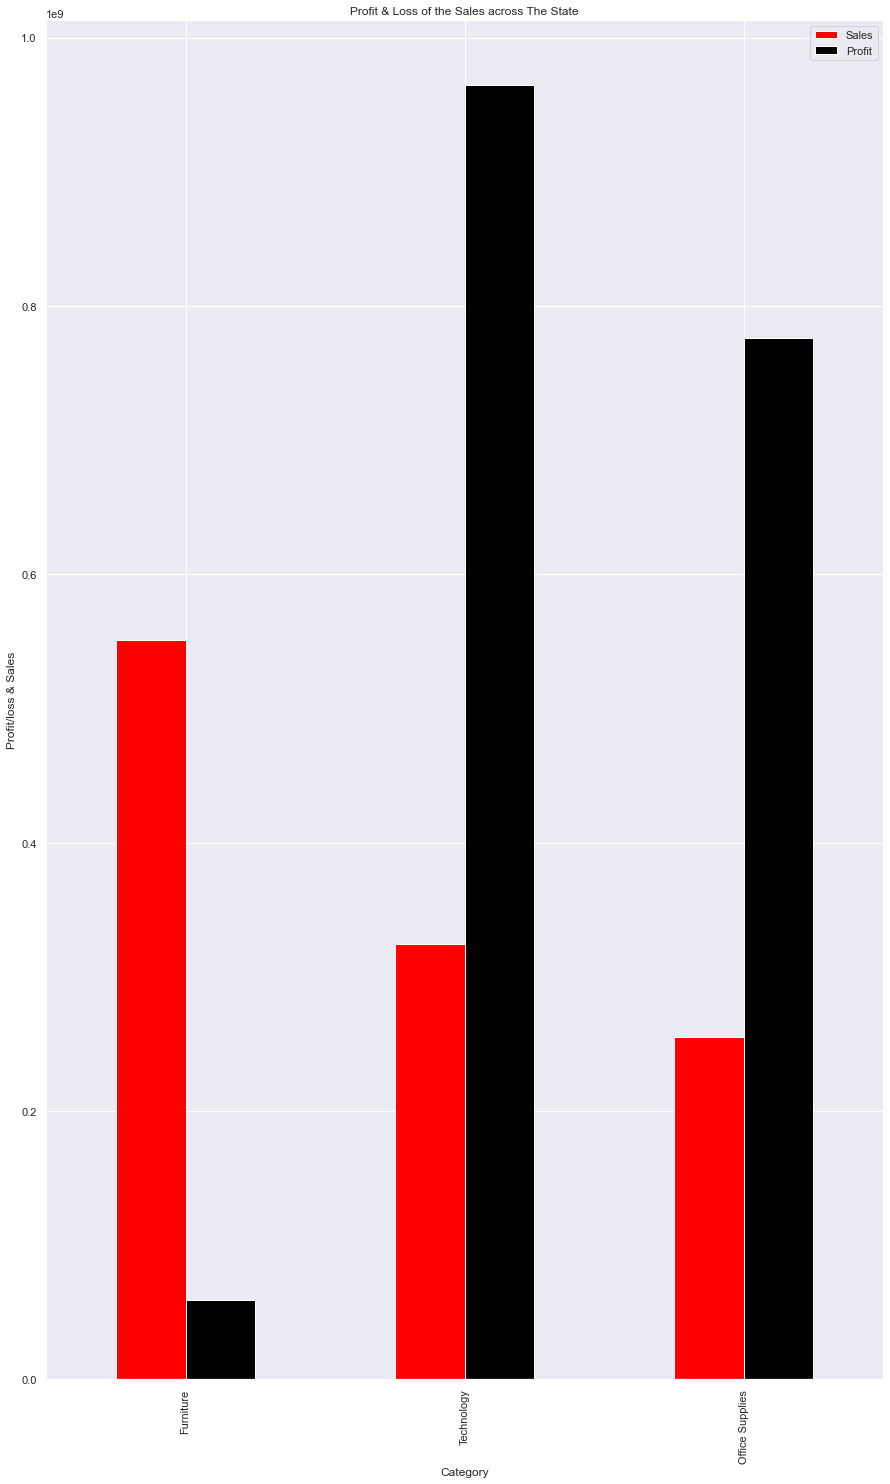

In [65]:
ps = dataset.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','black'],figsize=(15,25))
plt.title('Profit & Loss of the Sales across The State')
plt.xlabel('Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

In [66]:
# Group by sub-category
subcat_analysis = pd.DataFrame(dataset.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Bookcases,202537794,-26302244
Chairs,183494077,137064260
Phones,161332564,301952105
Tables,137518382,-141685875
Binders,104591554,164671515
Storage,65972178,163179121
Copiers,63804074,384550310
Machines,59424089,30751596
Accessories,40250206,247406084


In [67]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,63804074,384550310
Phones,161332564,301952105
Accessories,40250206,247406084
Paper,23661331,222810959
Binders,104591554,164671515
Storage,65972178,163179121
Chairs,183494077,137064260
Appliances,25831844,121918593
Furnishings,27840885,90146228


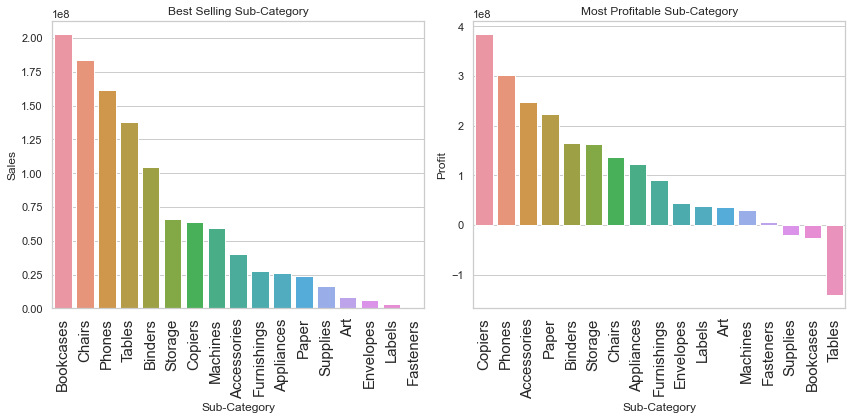

In [68]:

sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 15)
# Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 15)
figure.tight_layout()
plt.show()

# Conclusion

1. Copiers and phones are contributed to the highest profit among all the sub-categories.
2. Bookcases, tables, and supplies are the least profitable. Selling bookcases are contributed to the least profitable but with the highest discounts among all sub-categories, it can be contributed to the high sales
3. Technology is the best selling and this category is also the most profitable too
4. Phones and Chairs are Top 2 best selling sub-category.
